# Pymaceuticals Inc.
---

### Analysis
 #### 1. Analysis of some treatment regimens, including Capomulin, Ramicane, Infubinol, and Ceftamin showed, that there were no potential outliers in the tumor volume for Capomulin, Ramicane, and Ceftamin, which suggests that these treatments had consistent results. Infubinol had one potential outlier, indicating some variability in its treatment effectiveness. Also Capomulin and Ramicane showed more effective results.
 #### 2. The line plot of tumor volume over time for a single mouse in the Capomulin regimen demonstrated a general decreasing trend in tumor volume over time. So Capomulin treatment was effective in reducing tumor volume for this mouse.
 #### 3. There was a positive correlation between mouse weight and average tumor volume in the Capomulin regimen. So as the mouse weight increased, the average tumor volume also tended to increase.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge( study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Checking the number of mice.
mice_number = len(combined_data["Mouse ID"].unique())
mice_number

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_info=combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combined_data.drop_duplicates(subset="Mouse ID")
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice) != True]
clean_data = clean_data.reset_index(drop=True)
#clean_data.loc[:, "Tumor Volume (mm3)"] = clean_data["Tumor Volume (mm3)"].round(1)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean = len(clean_data["Mouse ID"].unique())
mice_number_clean

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Std. Dev.": tumor_volume_std_dev, "Tumor Volume Std. Err.": tumor_volume_std_err})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

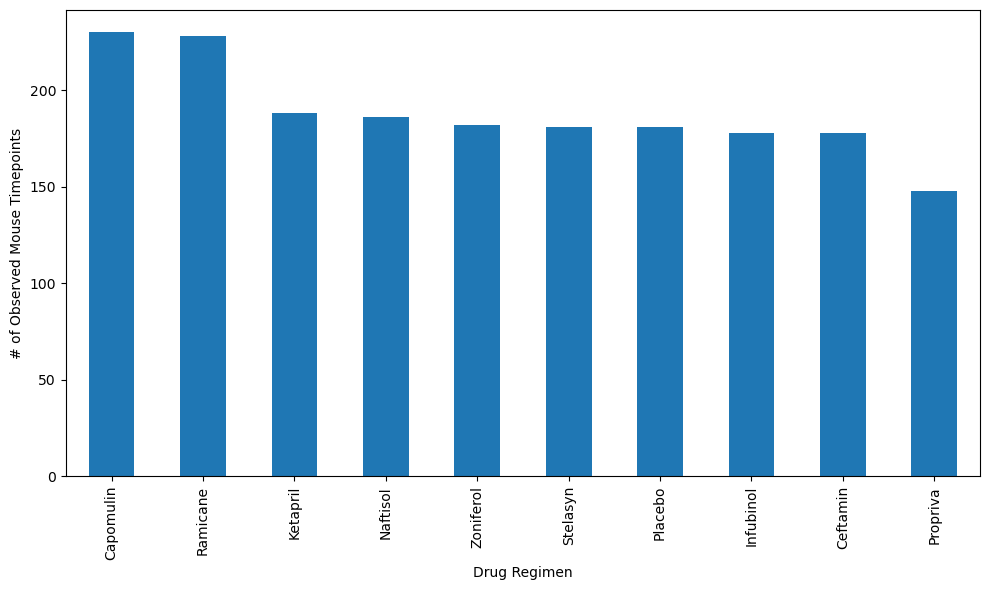

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", figsize=(10, 6), rot=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

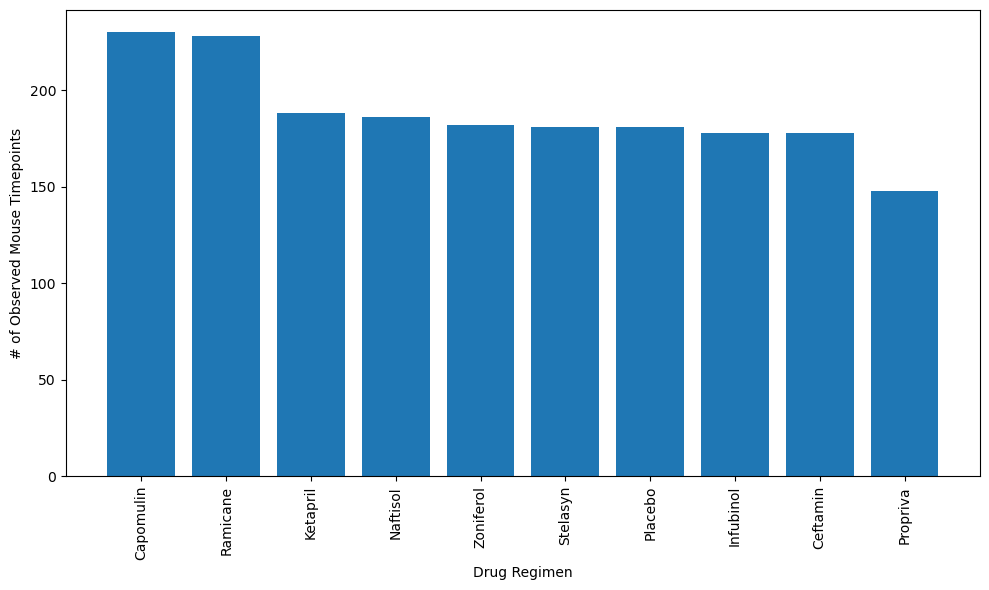

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=drug_regimen_counts.index
y_axis=drug_regimen_counts.values
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



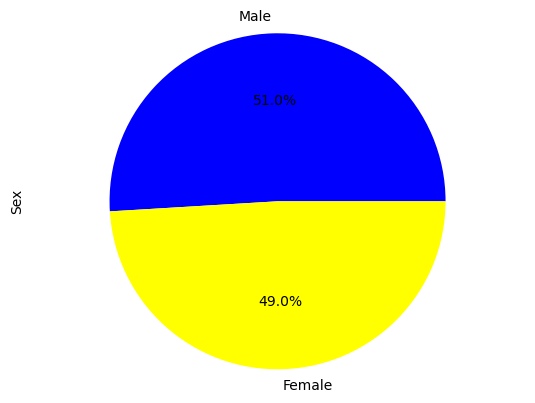

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_data["Sex"].value_counts()
sex_distribution.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "yellow"])
plt.ylabel("Sex")
plt.axis("equal") 
plt.show()

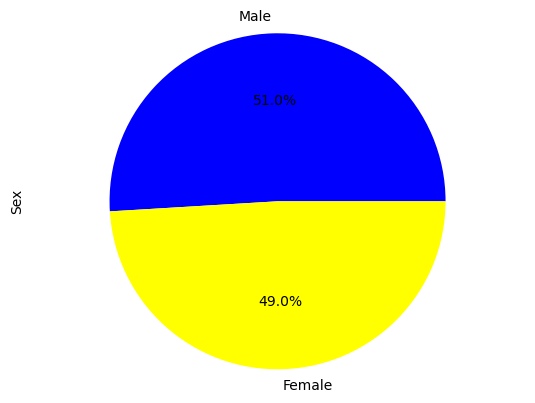

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "yellow"]
plt.pie(sex_distribution, labels=sex_distribution.index, autopct="%1.1f%%", colors=colors)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint_df=clean_data.merge(last_timepoint, on="Mouse ID", how="inner")
merged_timepoint_df=merged_timepoint_df.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Last Timepoint"})
last_timepoint_df=merged_timepoint_df[merged_timepoint_df["Timepoint"] == merged_timepoint_df["Last Timepoint"]]
last_timepoint_df=last_timepoint_df.reset_index(drop=True)
last_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,35,71.905117,0,Ketapril,Female,2,29,35
3,a457,10,49.783419,0,Ketapril,Female,11,30,10
4,c819,40,62.175705,1,Ketapril,Male,21,25,40


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
potential_outliers_dict = {}


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_timepoint_df[last_timepoint_df["Drug Regimen"] == treatment]
    
    # add subset 
    tumor_vol = treatment_data["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = treatment_data[(treatment_data["Tumor Volume (mm3)"] < lower_bound) | (treatment_data["Tumor Volume (mm3)"] > upper_bound)]
    potential_outliers_dict[treatment] = outliers["Tumor Volume (mm3)"] 
for treatment, outliers in potential_outliers_dict.items():
    print(f"{treatment}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



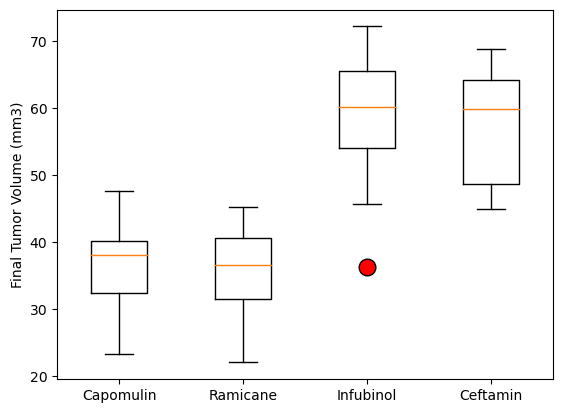

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker="o", markerfacecolor="red", markersize=12)
fig, ax = plt.subplots()
box_plot=ax.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()



##### Line and Scatter Plots

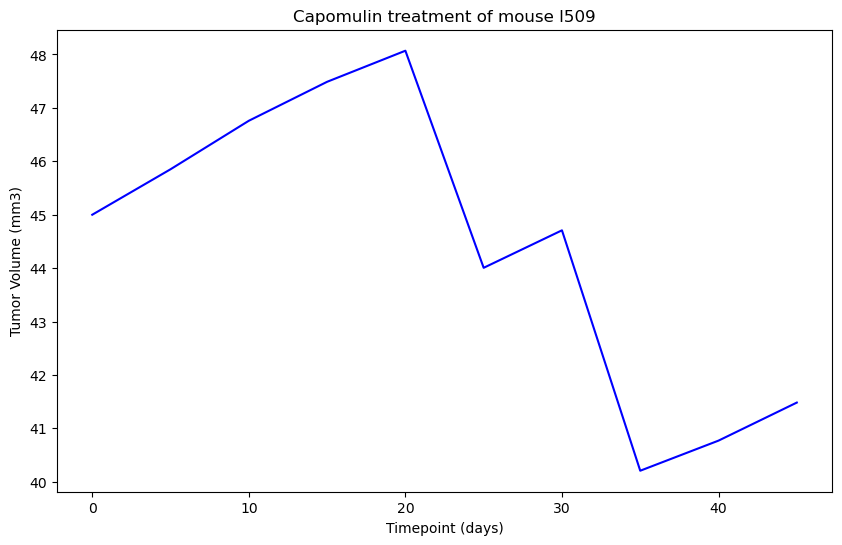

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id="l509"
single_mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == "Capomulin")]
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], color="blue")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

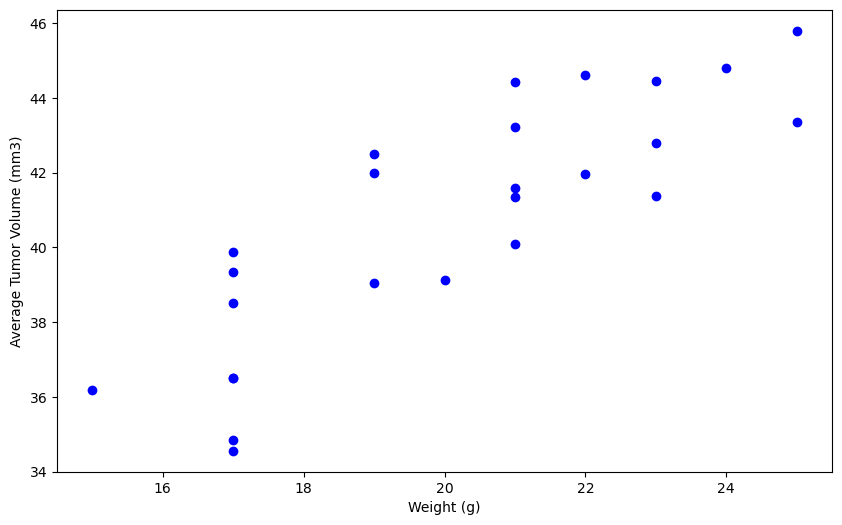

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=clean_data[clean_data["Drug Regimen"]=="Capomulin"]
average_tumor_volume=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights=capomulin_data.groupby("Mouse ID")["Weight (g)"].first()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker="o", color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


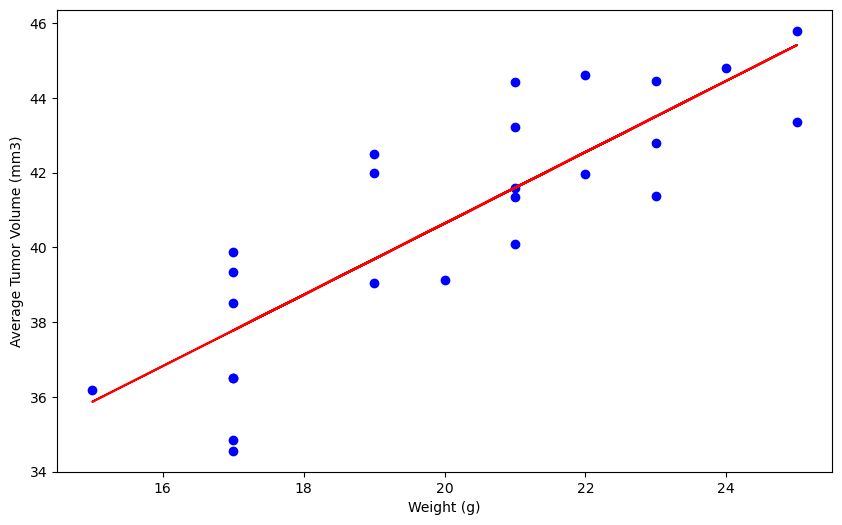

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation, _ = st.pearsonr(mouse_weights, average_tumor_volume)
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker="o", color="blue")
plt.plot(mouse_weights, regress_values, "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
plt.show()